# Importing Data Visualization and Manipulation Libraries

In [1]:

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')


# Reading the data

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

df = pd.read_csv(
    r"C:\Users\ds12\College\Python-Assignments\Dataset\Amazon-Products.csv", index_col=0
)

df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


# Describe the dataset

In [3]:
df.describe()


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,551585,551585,551585,551585,551585,375791,375791,490422,533772
unique,396210,20,112,462414,551585,49,8342,27511,23170
top,Zeya Yellow Gold Ring,accessories,Shirts,https://m.media-amazon.com/images/I/51uEPldT42...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.0,1,₹499,₹999
freq,718,116141,19200,3044,1,36609,39816,18248,48774


# Data Information

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 551585 entries, 0 to 1103
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 42.1+ MB


In [5]:
# Checking for null values

df.isnull().sum().sort_values(ascending=False)


ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
name                   0
main_category          0
sub_category           0
image                  0
link                   0
dtype: int64

In [6]:
df["actual_price"] = df["actual_price"].str.strip("₹")
df["discount_price"] = df["discount_price"].str.strip("₹")
df["no_of_ratings"] = df["no_of_ratings"].str.replace(",", "")
df["ratings"] = df["ratings"].str.replace(",", "")
# Keeping the numeric values in the columns and replacing the rest with NaN

df["ratings"] = pd.to_numeric(df["ratings"], errors="coerce")
df["no_of_ratings"] = pd.to_numeric(df["no_of_ratings"], errors="coerce")
df["actual_price"] = pd.to_numeric(df["actual_price"], errors="coerce")
df["discount_price"] = pd.to_numeric(df["discount_price"], errors="coerce")

In [7]:
# Replcaing the NaN values with the median of the column

df["ratings"].fillna(df["ratings"].median(), inplace=True)
df["no_of_ratings"].fillna(df["no_of_ratings"].median(), inplace=True)
df["actual_price"].fillna(df["actual_price"].median(), inplace=True)
df["discount_price"].fillna(df["discount_price"].median(), inplace=True)
df.drop(["image", "link"], axis=1, inplace=True)

In [8]:
df.isna().sum().sort_values(ascending=False)


name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [9]:
# Checking for duplicates and removing them

df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [10]:
df.head()


,name,main_category,sub_category,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,4.2,2255.0,470.4,725.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.2,2948.0,470.4,725.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,4.2,1206.0,470.4,725.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,4.0,69.0,470.4,725.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,4.1,630.0,470.4,725.0


# EDA and Data Visualization

In [ ]:
# Anwering som questions using the data set 

# 1. What is the average rating of the products?

# 2. What is the average price of the products?

# 3. What is the average discount price of the products?

# 4. What is the average number of ratings of the products?

# 5. What is the average number of r

### Q1 Getting the name of products with ratings greater than 4.5 and have the highest number of ratings in each main category

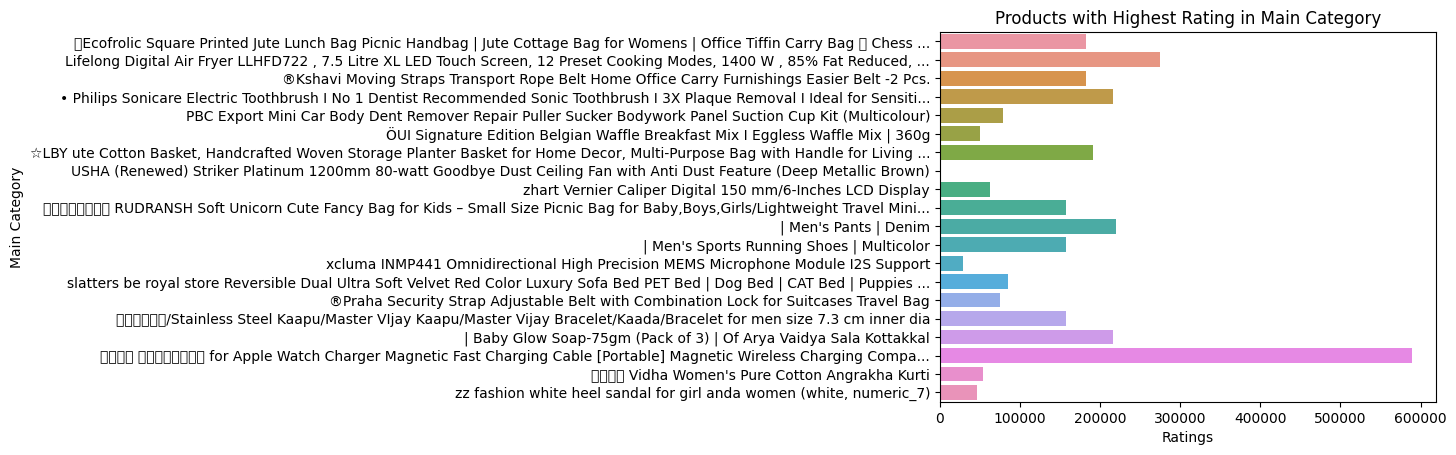

In [17]:
top_products_main_category = df.groupby(["main_category"])[
    "name", "no_of_ratings"
].max()
top_products_main_category

# Plottting the above data

sns.barplot(x="no_of_ratings", y="name", data=top_products_main_category)
plt.title("Products with Highest Rating in Main Category")
plt.ylabel("Main Category")
plt.xlabel("Ratings")
plt.show()

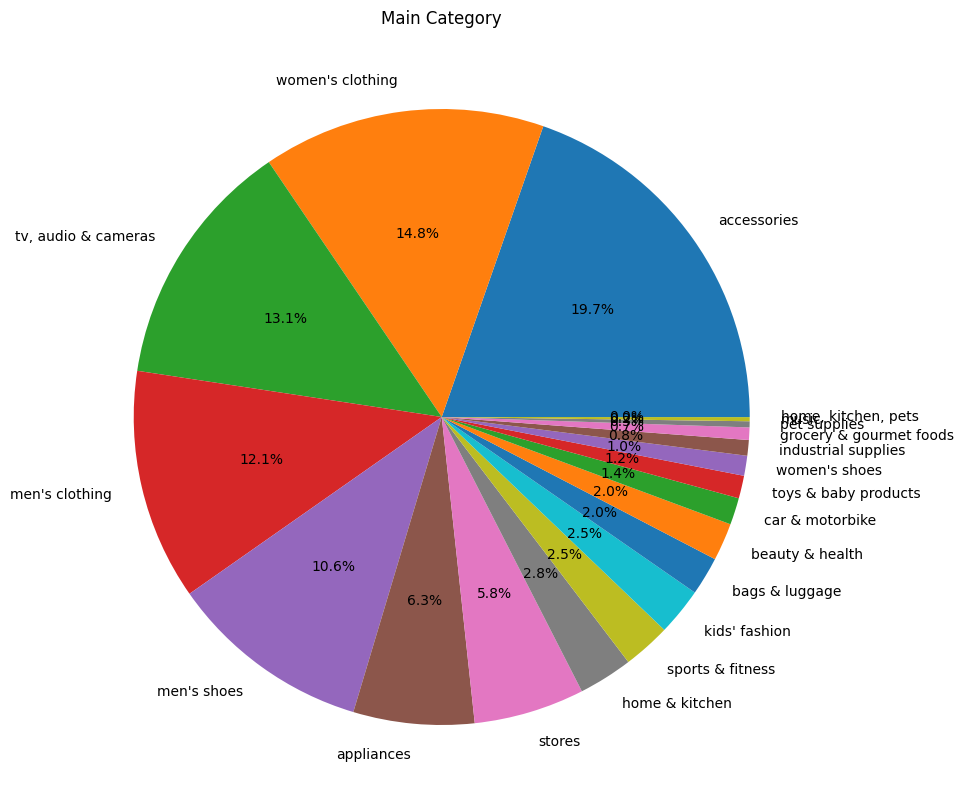

In [25]:
# Pie chart for the main category based on the number of products

plt.figure(figsize=(10, 10))
plt.pie(df["main_category"].value_counts(), labels=df["main_category"].value_counts().index, autopct="%1.1f%%")
plt.title("Main Category")
plt.show()


Text(0, 0.5, 'Price')

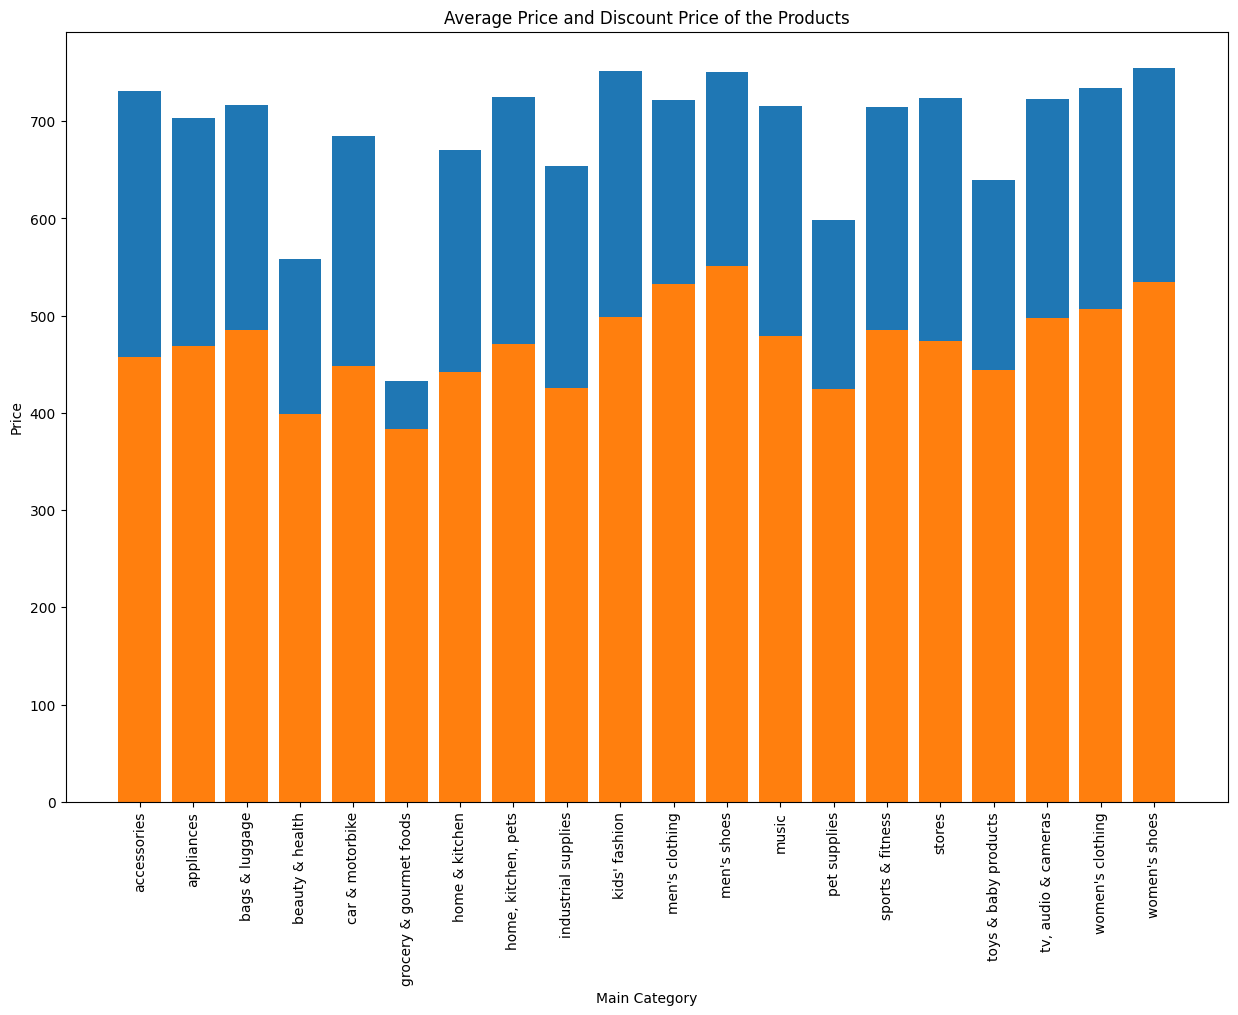

In [36]:
# Creating a stacked bar chart for the average price and discount price of the products

groupby_1 = df.groupby(["main_category"])['actual_price'].mean()
groupby_2 = df.groupby(["main_category"])['discount_price'].mean()



plt.figure(figsize=(15, 10))
plt.bar(groupby_1.index, groupby_1.values, label="Actual Price")
plt.bar(groupby_2.index, groupby_2.values, label="Discount Price")
plt.title("Average Price and Discount Price of the Products")
plt.xlabel("Main Category")
plt.tick_params(axis="x", rotation=90)
plt.ylabel("Price")